<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/A1/A1_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [70]:
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
51689,2022-09-21,Virginia,51,2076914,21729
51690,2022-09-21,Washington,53,1805951,14277
51691,2022-09-21,West Virginia,54,597303,7379
51692,2022-09-21,Wisconsin,55,1857343,15215


In [71]:
data2 = data.sort_values(by=['state','date'])
print(data2)

             date    state  fips   cases  deaths
586    2020-03-13  Alabama     1       6       0
637    2020-03-14  Alabama     1      12       0
689    2020-03-15  Alabama     1      23       0
742    2020-03-16  Alabama     1      29       0
795    2020-03-17  Alabama     1      39       0
...           ...      ...   ...     ...     ...
51469  2022-09-17  Wyoming    56  175746    1888
51525  2022-09-18  Wyoming    56  175746    1888
51581  2022-09-19  Wyoming    56  175746    1888
51637  2022-09-20  Wyoming    56  176256    1891
51693  2022-09-21  Wyoming    56  176256    1891

[51694 rows x 5 columns]


In [72]:
from dateutil import parser
for i in range(len(data2)):
  date = parser.parse(data2['date'][i])
  data2['date'][i] = date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,state,fips,cases,deaths,New_Cases
0,2020-03-08 00:00:00,Connecticut,9,1,0,1.0
1,2020-03-09 00:00:00,Connecticut,9,2,0,1.0
2,2020-03-10 00:00:00,Connecticut,9,2,0,0.0
3,2020-03-11 00:00:00,Connecticut,9,3,0,1.0
4,2020-03-12 00:00:00,Connecticut,9,6,0,3.0
...,...,...,...,...,...,...
923,2022-09-17 00:00:00,Connecticut,9,887501,11330,0.0
924,2022-09-18 00:00:00,Connecticut,9,888388,11331,887.0
925,2022-09-19 00:00:00,Connecticut,9,888862,11331,474.0
926,2022-09-20 00:00:00,Connecticut,9,889661,11343,799.0


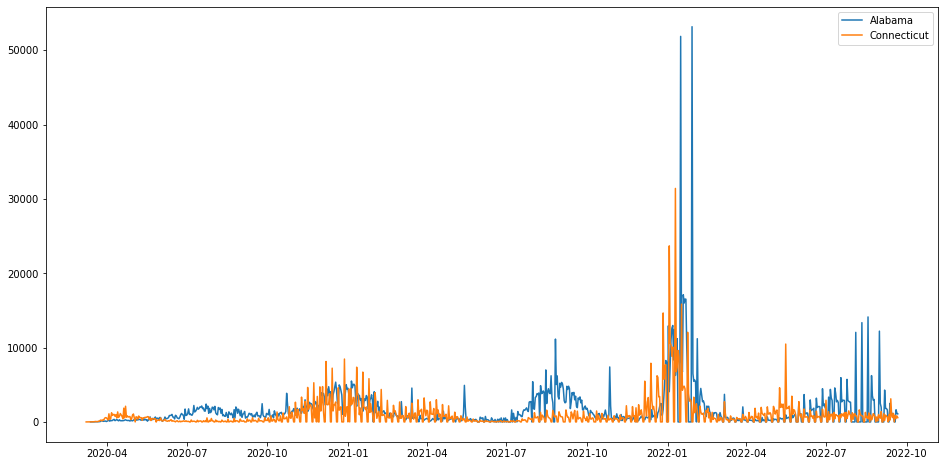

In [66]:
import string
import matplotlib.pyplot as plt

state_names = ['Alabama', 'Connecticut']

plt.rcParams['figure.figsize'] = (16,8)

for i in range(len(state_names)):
  data3 = data2[data2['state'] == state_names[i]] 
  data3 = data3.reset_index(drop=True)
  
  data3['New_Cases'] = data3['cases'].diff()
  data3.at[0,'New_Cases'] = data3.iloc[0]['cases']

  plt.plot(data3['date'], data3['New_Cases'], label = state_names[i])
  plt.legend()


data3

In [80]:
state_max = input("Input a state name to see its max daily cases: ")
data4 = data2[data2['state'] == state_max]
max_case = data4['cases'].max()
data4
print(max_case)

Input a state name to see its max daily cases: Alabama
1517046


In [138]:
import datetime

state_compare = []
for i in range(0,1):
  state_input = input("Input two state names separated by a comma: ")
  state_compare = state_input.split(", ")

compare_state_1 = data2[data2['state'] == state_compare[0]]
compare_state_2 = data2[data2['state'] == state_compare[1]]

compare_state_1['New_Cases'] = compare_state_1['cases'].diff()
compare_state_2['New_Cases'] = compare_state_2['cases'].diff()

state_1_max = compare_state_1['New_Cases'].max()
state_2_max = compare_state_2['New_Cases'].max()

print("State with higher daily new cases:")
if state_1_max > state_2_max: 
  print(state_compare[0], ':', state_1_max, 'new cases')
else:
  print(state_compare[1], ':', state_2_max, 'new cases')

#print(compare_state_1.loc[compare_state_1['New_Cases'] == state_1_max])
#print(compare_state_2.loc[compare_state_2['New_Cases'] == state_2_max])

state_1_date = compare_state_1.loc[compare_state_1['New_Cases'] == state_1_max, ['date']]
#print(state_1_date)
state_2_date = compare_state_2.loc[compare_state_2['New_Cases'] == state_2_max, ['date']]
#print(state_2_date)

specific_state_1_date = state_1_date.iloc[0].item()
specific_state_2_date = state_2_date.iloc[0].item()


print((specific_state_1_date - specific_state_2_date).days)

Input two state names separated by a comma: New York, Connecticut
State with higher daily new cases:
New York : 90132.0 new cases
-2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
3